### Importing libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from array import array

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
startup_data = pd.read_csv(r'50_Startups.csv')
user_data = pd.read_csv(r'User_data.csv')

## Startup Data

In [ ]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Splitting the data into input and target classes

In [ ]:
x_data = startup_data.drop('Profit', axis=1)
y_data = startup_data['Profit']

In [ ]:
# type(x_data)
x_data.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
# type(y_data)
y_data.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
# type(y_data)
y_data = y_data.to_numpy()

### Since State is string type data, we can't process as it is, so we will use label encoder to convert it into numeric labels

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'State'.
x_data['State']= label_encoder.fit_transform(x_data['State'])

# x_data['State'].unique()
x_data.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
sc = StandardScaler()
x_data = sc.fit_transform(x_data)
# type(x_data)
x_data

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         1.21267813e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
        -1.21267813e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.21267813e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.21267813e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
        -1.21267813e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
         1.21267813e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
        -1.21267813e+00],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01,
         0.00000000e+00],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01,
      

#### Splitting data into training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

### Multiple Linear Regression

### y = b + $w_{1}$$x_{1}$ + $w_{2}$$x_{2}$ + ... + $w_{n}$$x_{n}$




### Mean Square Error
![MSE](https://miro.medium.com/max/1100/1*3RBV7LdmmabuP9ajDnFxJQ.webp)


### Derivative of MSE
![](https://miro.medium.com/max/828/1*TjxypVMQVjOOT2w7299-Ow.webp)

In [ ]:
class MyLinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''

    def __init__(self, learning_rate=0.01, n_iterations=100000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        self.y_val = []
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        Args:
            X: array, features
            y: array, true values
            
        Returns:
            None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # 2. Perform gradient descent
        for i in range(self.n_iterations) or (loss[-2]>loss[-1]):
            
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            if i == self.n_iterations - 1:
                self.y_val.append(y_hat)
            loss = mean_squared_error(y, y_hat)
            # print(loss)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            # print(type(self.weights))
            # print(type(self.learning_rate))
            # print(type(partial_d))
            self.weights = self.weights - (self.learning_rate * partial_w)
            self.bias = self.bias - (self.learning_rate * partial_d)
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        Args:
            X: array, features
            
        Returns:
            array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

In [ ]:
LRmodel = MyLinearRegression()

LRmodel.fit(x_train, y_train)
preds = LRmodel.predict(x_test)

In [ ]:
print('The coefficients and loss after optimization are:')
print(f'bias: {LRmodel.bias}')
print(f'weights: {LRmodel.weights}')

print(f'MSE: {mean_squared_error(preds, y_test)}')

The coefficients and loss after optimization are:
bias: 111677.16370134386
weights: [ 3.65251649e+04 -1.88357234e+03  3.78444552e+03 -1.38703803e+01]
MSE: 80929465.49099249


In [ ]:
# Using sklearn library to compare our results
LR = LinearRegression()

LR.fit(x_train, y_train)
LRpred = LR.predict(x_test)

In [ ]:
print('The coefficients and loss on using sklearn library')
print(f'bias: {LR.coef_}')
print(f'weights: {LR.intercept_}')

print(f'MSE: {mean_squared_error(LRpred, y_test)}')

The coefficients and loss on using sklearn library
bias: [ 3.65251649e+04 -1.88357234e+03  3.78444552e+03 -1.38703803e+01]
weights: 111677.1637013443
MSE: 80929465.49099013


In [ ]:
diff = {'Original': y_test, 'Predicted': preds}
diff = pd.DataFrame(data=diff)
diff

,Original,Predicted
0,134307.35,126720.661507
1,81005.76,84909.089619
2,99937.59,98890.318549
3,64926.08,46479.312402
4,125370.37,129113.183188
5,35673.41,50968.883978
6,105733.54,109015.016268
7,107404.34,100893.570781
8,97427.84,97713.738214
9,122776.86,113085.590561


### Analysis /  Contour Plots

#### When comparing the result obtained by our Regression model with standard model, we noticed that the result that we got were very close to the actual data. Also, the BCE error that we got were very close.

In [ ]:
startup_data.corr()

C:\Users\rohan\AppData\Local\Temp\ipykernel_7240\614152284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup_data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### As we can see that 'Administration' and 'Marketing Spend' are least correlated (-0.032154) and we know that in contour plots, X-axes and Y-axes denotes values of two independent variables, so we decided to go with these tho features.

In [ ]:
# Preprocessing for contour plots
x_train_CP = startup_data.drop(['Profit','State', 'R&D Spend'], axis=1)  
y_train_CP = startup_data['Profit']

scaler = StandardScaler()
x_train_CP = scaler.fit_transform(x_train_CP)

w_initial = np.array((0, 0)) #initial weights
lr = 0.001 #learning rate
tolerance = 1e-3
epochs = 10000

In [ ]:
def mean_square_error(y_actual, y_pred):
    cost = np.sum((y_actual - y_pred)**2)/len(y_actual)
    return cost

def calculate_gradients(W, x, y):
    #assuming a fixed bias so that we can visualize in 3d
    
    y_pred = x.dot(W)
#     print(f'y_pred: {y_pred}')
    err = y - y_pred
    mse = mean_square_error(y, y_pred)
    gradient = -(err.dot(x)/len(x))
#     print(f'gradient: {gradient}')
    return gradient, mse

def gradient_descent(w, lr, epochs):
    old_w = []
    errors = []
    #Performing gradient descent
    iterations = 1

    for i in range(epochs):
        gradient, error = calculate_gradients(w, x_train_CP, y_train_CP)
        new_w = w - (lr * gradient)

        #Printing error after 10 iterations
        if iterations % 500 == 0:
            print("Iteration:", iterations, " Cost: ", error)
            old_w.append(new_w)
            errors.append(error)

        #Stopping condition
        if np.sum(abs(new_w - w)) < tolerance:
            print("Gradient descent has converged")
            break

        iterations+=1
        w = new_w
  
    print("Final weight values are: ", w)
    return w, old_w, errors

In [ ]:
w, old_w, errors = gradient_descent(w_initial, lr, epochs)
all_ws = np.array(old_w)

Iteration: 500  Cost:  13532051465.933311
Iteration: 1000  Cost:  13304406883.999561
Iteration: 1500  Cost:  13219220493.664505
Iteration: 2000  Cost:  13187320281.520096
Iteration: 2500  Cost:  13175366199.05385
Iteration: 3000  Cost:  13170883628.744907
Iteration: 3500  Cost:  13169201671.039753
Iteration: 4000  Cost:  13168570177.18655
Iteration: 4500  Cost:  13168332942.382786
Iteration: 5000  Cost:  13168243769.629484
Iteration: 5500  Cost:  13168210232.961359
Iteration: 6000  Cost:  13168197613.776787
Iteration: 6500  Cost:  13168192863.091856
Iteration: 7000  Cost:  13168191073.784739
Iteration: 7500  Cost:  13168190399.555296
Iteration: 8000  Cost:  13168190145.390486
Iteration: 8500  Cost:  13168190049.53896
Iteration: 9000  Cost:  13168190013.377174
Iteration: 9500  Cost:  13168189999.72947
Iteration: 10000  Cost:  13168189994.576948
Final weight values are:  [ 8976.58191822 30123.75718759]


In [ ]:
errors.append(1.36e+10)
levels = np.sort(np.array(errors))

w0 = np.linspace(-w[0]*4, w[0]*4, 100)
w1 = np.linspace(-w[1]*4, w[1]*4, 100)

mse_vals = np.zeros(shape=(w0.size, w1.size))

for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1, value2))
        mse_vals[i,j] = calculate_gradients(w_temp, x_train_CP, y_train_CP)[1]

In [ ]:
mse_vals

array([[3.74344871e+10, 3.67141457e+10, 3.60056554e+10, ...,
        2.27399912e+10, 2.31692044e+10, 2.36102686e+10],
       [3.73769237e+10, 3.66564688e+10, 3.59478649e+10, ...,
        2.26714133e+10, 2.31005130e+10, 2.35414637e+10],
       [3.73204127e+10, 3.65998442e+10, 3.58911268e+10, ...,
        2.26038878e+10, 2.30328739e+10, 2.34737110e+10],
       ...,
       [3.67505967e+10, 3.60192408e+10, 3.52997360e+10, ...,
        2.09876943e+10, 2.14058930e+10, 2.18359428e+10],
       [3.67951116e+10, 3.60636421e+10, 3.53440238e+10, ...,
        2.10211947e+10, 2.14392799e+10, 2.18692161e+10],
       [3.68406788e+10, 3.61090958e+10, 3.53893639e+10, ...,
        2.10557475e+10, 2.14737191e+10, 2.19035417e+10]])

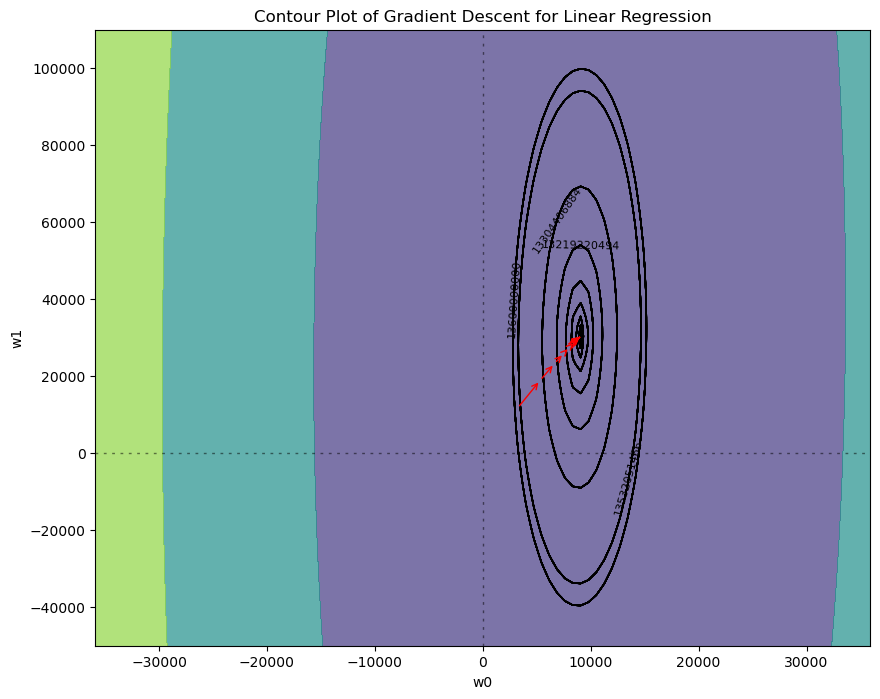

In [ ]:
plt.figure(figsize=(10,8))
plt.contourf(w0, w1, mse_vals, levels=2, alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
    CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent for Linear Regression")
plt.xlabel("w0")
plt.ylabel("w1")
plt.ylim(-50000, 110000)
plt.show()

## User Data

In [ ]:
user_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x_usr_data = user_data.drop('Purchased', axis=1)
y_usr_data = user_data['Purchased']

In [ ]:
# type(x_usr_data)
x_usr_data.head(8)
# x_usr_data.shape

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
5,15728773,Male,27,58000
6,15598044,Female,27,84000
7,15694829,Female,32,150000


In [ ]:
# type(y_usr_data)
y_usr_data.head(8)
# y_usr_data.shape

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
Name: Purchased, dtype: int64

### Since we don't need UserID to determine if a purchase will be made or not, we'll simply drop it. Also, we'll convert gender from string to binary type.

In [ ]:
x_usr_data.drop(columns='User ID', inplace=True)
x_usr_data.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Gender'.
x_usr_data['Gender']= label_encoder.fit_transform(x_usr_data['Gender'])
x_usr_data.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [ ]:
sc = StandardScaler()
x_usr_data = sc.fit_transform(x_usr_data)
# type(x_data)
x_usr_data

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

#### Splitting data into training and testing

In [ ]:
x_usr_train, x_usr_test, y_usr_train, y_usr_test = train_test_split(x_usr_data, y_usr_data, test_size=0.2, random_state=42)

### Logistic Regression

##### Mathematical Intuition:
##### The cost function of linear regression (or mean square error) can’t be used in logistic regression because it is a non-convex function of weights. Optimizing algorithms like i.e gradient descent only converge convex function into a global minimum. 

##### So, the simplified cost function we use :

![](https://miro.medium.com/max/1400/1*cMEoGURM8nMlJxfaaJyMJQ.webp)

#### where, a is our sigmoid function, given as

![](https://miro.medium.com/max/1400/1*j5I3bB2x25TunkpT_SnygA.webp)

#### which further is a function of w, x

![](https://miro.medium.com/max/1400/1*_ciSO6w0rGsQrGtGsf-3fA.webp)

### Derivative of Loss Function

#### Using chain rule, we can calculate the derivative of loss fn. wrt the weights w and bias b

![](https://miro.medium.com/max/1400/1*-GZkwi2FHC4KWHgXCeIpyA.webp)

#### which is

![image.png](attachment:image.png)

In [ ]:
class MyLogitRegression() :
    def __init__(self, learning_rate=0.01, iterations=100000) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
        self.W, self.b = None, None

    # Function for model training    
    def fit( self, X, Y):    

        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape   
        # weight initialization        
        self.W = np.zeros(self.n)        
        self.b = 0        
        self.X = X        
        self.Y = Y

        # gradient descent learning        
        for i in range(self.iterations) :    
            # sigmoid(z) = 1 / ( 1 + e^(-z) )
            Z = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )

            # calculate gradients        
            Z = ( Z - self.Y.T )
            Z = np.reshape( Z, self.m )        

            dW = np.dot( self.X.T, Z ) / self.m         
            db = np.sum( Z ) / self.m 

            # update weights    
            self.W = self.W - self.learning_rate * dW    
            self.b = self.b - self.learning_rate * db    
        return self

    # h(x) = sigmoid(wx + b)
    def predict( self, X ) :    
        h_x = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( h_x > 0.5, 1, 0 )        
        return Y

In [ ]:
LogitModel = MyLogitRegression()

LogitModel.fit(x_usr_train, y_usr_train)
preds = LogitModel.predict(x_usr_test)

In [ ]:
print('The coefficients and loss after optimization are:')
print(f'weights: {LogitModel.W}')
print(f'bias: {LogitModel.b}')

print(f'Loss: {log_loss(preds, y_usr_test)}')

The coefficients and loss after optimization are:
weights: [0.15774554 2.21191841 1.22287573]
bias: -1.120723501577897
Loss: 4.054911006275679


In [ ]:
y_usr_test.shape

(80,)

In [ ]:
LRModel = LogisticRegression()
LRModel.fit(x_usr_data, y_usr_data)
LRPreds = LogitModel.predict(x_usr_test)

In [ ]:
print('The coefficients and loss on using sklearn library')
print(f'weights: {LRModel.coef_}')
print(f'bias: {LRModel.intercept_}')

print(f'BCE: {log_loss(preds, y_usr_test)}')

The coefficients and loss on using sklearn library
weights: [[0.14612452 2.29205004 1.14743324]]
bias: [-1.09886666]
BCE: 4.054911006275679


### Analysis

#### When comparing the result obtained by our Regression model with standard model, we noticed that the result that we got were very close to the actual data. Also, the BCE error that we got were very close

<AxesSubplot: >

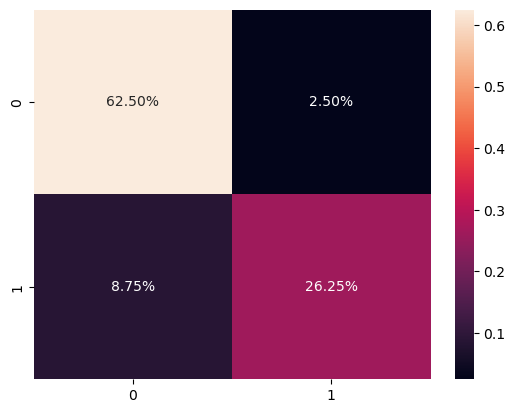

In [ ]:
cf_matrix = confusion_matrix(y_usr_test, preds)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%')